# Reading and Understanding the Data

In [2]:
# Import Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 900)
pd.set_option('display.max_info_columns',500)

In [4]:
# Load the given csv files as dataframe
day =pd.read_csv("C:/Users/user/Desktop/python/day.csv")

In [5]:
# checking rows and couloms
day.shape

(730, 16)

In [6]:
# Check the head of the dataset
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# from data dictionary we see that casual and registered are subplots of cnt, instant is an index column and 
# dteday is not required because its not a time series analysis, hence dropping all these columns.
day_data=day.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
day_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
# looking for missing values
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [9]:
# summary of numericvariable
day_data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Visualising the data

In [ ]:
# We'll visualise our data using matplotlib and seaborn.

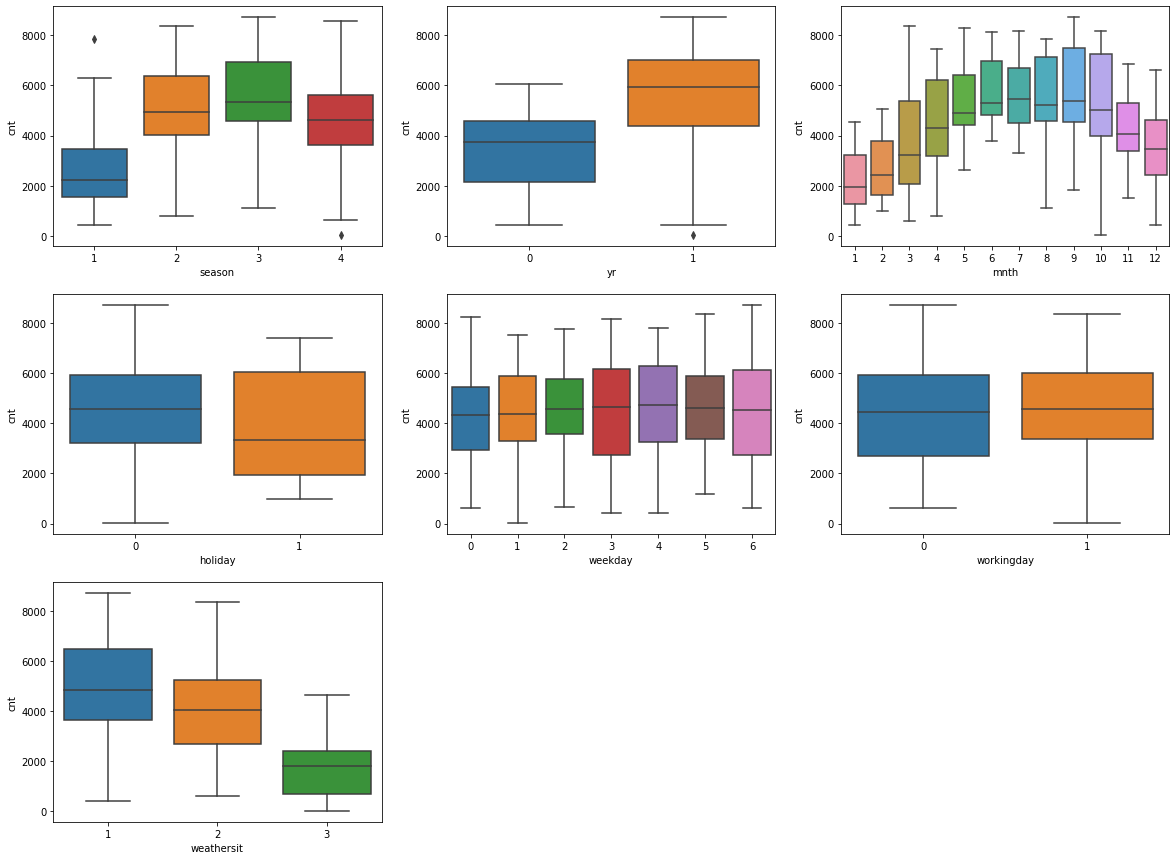

In [10]:
# Visualising the categorical variables
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data=day_data)

plt.subplot(3, 3, 2)
sns.boxplot(x='yr', y='cnt', data=day_data)

plt.subplot(3, 3, 3)
sns.boxplot(x='mnth', y='cnt', data=day_data)

plt.subplot(3, 3, 4)
sns.boxplot(x='holiday', y='cnt', data=day_data)

plt.subplot(3, 3, 5)
sns.boxplot(x='weekday', y='cnt', data=day_data)

plt.subplot(3, 3, 6)
sns.boxplot(x='workingday', y='cnt', data=day_data)

plt.subplot(3, 3, 7)
sns.boxplot(x='weathersit', y='cnt', data=day_data)

plt.show()

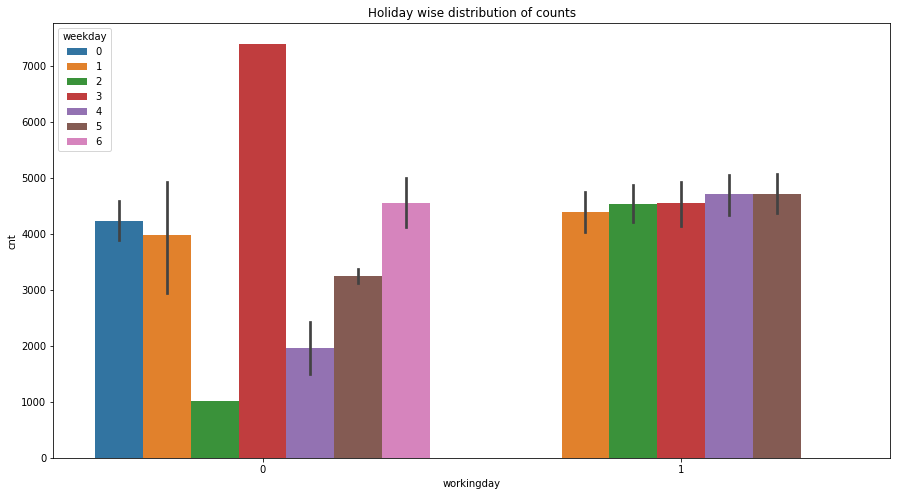

In [12]:
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=day_data,x='workingday',y='cnt',hue='weekday')
ax.set_title('Holiday wise distribution of counts')
plt.show()

# Data Preperation
### Dummy Variables

In [10]:
# Creating Dummy Variables for Categorical features
seasn = pd.get_dummies(day_data['season'])
seasn.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [11]:
# Creating Dummy Variables for season
# dropping first variable to give more efficiency to data
seasn = pd.get_dummies(day_data['season'], drop_first=True)
seasn.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [12]:
# renaming columns as per convinience
seasn.rename(columns={2:'season_summer',3:'season_fall',4:'season_winter'},inplace=True)
seasn.head()

,season_summer,season_fall,season_winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [13]:
# concat dummy variables with original ones and removing season
day_data = pd.concat([day_data, seasn], axis=1)
day_data = day_data.drop('season', axis=1)
day_data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [14]:
# Creating Dummy Variables for yr
# dropping first variable to give more efficiency to data
# renaming columns as per convinience
year = pd.get_dummies(day_data['yr'])
year = pd.get_dummies(day_data['yr'], drop_first=True)
year.rename(columns={1:'yr_2019'},inplace=True)
year.head()

,yr_2019
0,0
1,0
2,0
3,0
4,0


In [15]:
# concat dummy variables with original ones and removing yr
day_data = pd.concat([day_data, year], axis=1)
day_data = day_data.drop('yr', axis=1)
day_data.head()

,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_2019
0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0
1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0
2,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0
3,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0
4,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0


In [16]:
# Creating Dummy Variables for mnth
# dropping first variable to give more efficiency to data
# renaming columns as per convinience
month = pd.get_dummies(day_data['mnth'])
month = pd.get_dummies(day_data['mnth'], drop_first=True)
month.rename(columns={2:'mnth_feb',3:'mnth_mar',4:'mnth_apr',5:'mnth_may',6:'mnth_jun',7:'mnth_jul', 
                     8:'mnth_aug', 9:'mnth_sep', 10:'mnth_oct', 11:'mnth_nov', 12:'mnth_dec' },inplace=True)
month.head()

,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# concat dummy variables with original ones and removing mnth
day_data = pd.concat([day_data, month], axis=1)
day_data = day_data.drop('mnth', axis=1)
day_data.head()

,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_2019,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec
0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# Creating Dummy Variables for holiday
# dropping first variable to give more efficiency to data
# renaming columns as per convinience
hldy = pd.get_dummies(day_data['holiday'])
hldy = pd.get_dummies(day_data['holiday'], drop_first=True)
hldy.rename(columns={1:'yes_holiday'},inplace=True)
hldy.head()

,yes_holiday
0,0
1,0
2,0
3,0
4,0


In [19]:
# concat dummy variables with original ones and removing holiday
day_data = pd.concat([day_data, hldy], axis=1)
day_data = day_data.drop('holiday', axis=1)
day_data.head()

,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_2019,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,yes_holiday
0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# Creating Dummy Variables for weekday
# dropping first variable to give more efficiency to data
# renaming columns as per convinience
wkdy = pd.get_dummies(day_data['weekday'])
wkdy = pd.get_dummies(day_data['weekday'], drop_first=True)
wkdy.rename(columns={1:'weekday_mon',2:'weekday_tues',3:'weekday_wed',4:'weekday_thurs',5:'weekday_fri',
                     6:'weekday_sat'},inplace=True)
wkdy.head()

,weekday_mon,weekday_tues,weekday_wed,weekday_thurs,weekday_fri,weekday_sat
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [21]:
# concat dummy variables with original ones and removing weekday
day_data = pd.concat([day_data, wkdy], axis=1)
day_data = day_data.drop('weekday', axis=1)
day_data.head()

,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_2019,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,yes_holiday,weekday_mon,weekday_tues,weekday_wed,weekday_thurs,weekday_fri,weekday_sat
0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [22]:
# Creating Dummy Variables for workingday
# dropping first variable to give more efficiency to data
# renaming columns as per convinience
wrkdy = pd.get_dummies(day_data['workingday'])
wrkdy = pd.get_dummies(day_data['workingday'], drop_first=True)
wrkdy.rename(columns={1:'workingday_yes'},inplace=True)
wrkdy.head()

,workingday_yes
0,0
1,0
2,1
3,1
4,1


In [23]:
# concat dummy variables with original ones and removing workingday
day_data = pd.concat([day_data, wrkdy], axis=1)
day_data = day_data.drop('workingday', axis=1)
day_data.head()

,weathersit,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_2019,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,yes_holiday,weekday_mon,weekday_tues,weekday_wed,weekday_thurs,weekday_fri,weekday_sat,workingday_yes
0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [24]:
# Creating Dummy Variables for weathersit
weather_condition = pd.get_dummies(day_data['weathersit'])
weather_condition.head()

,1,2,3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [25]:
# dropping first variable to give more efficiency to data
# renaming columns as per convinience
weather_condition = pd.get_dummies(day_data['weathersit'], drop_first=True)
weather_condition.rename(columns={2:'weathersit_2',3:'weathersit_3'},inplace=True)
weather_condition.head()

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [26]:
# concat dummy variables with original ones and removing weathersit
day_data = pd.concat([day_data, weather_condition], axis=1)
day_data = day_data.drop('weathersit', axis=1)
day_data.head()

,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_2019,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,yes_holiday,weekday_mon,weekday_tues,weekday_wed,weekday_thurs,weekday_fri,weekday_sat,workingday_yes,weathersit_2,weathersit_3
0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


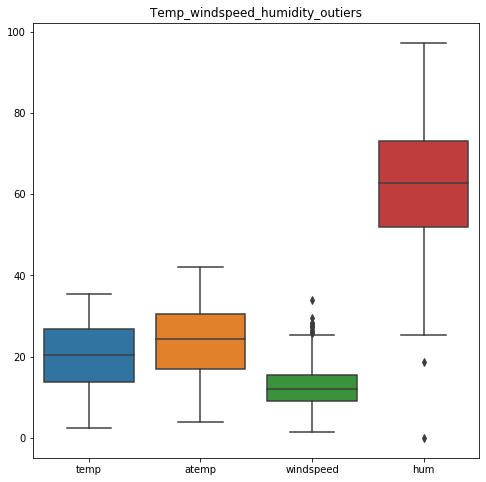

In [30]:
# checking for outliers in temp atemp windspeed hum
fig,ax=plt.subplots(figsize=(8,8))
sns.boxplot(data=day_data[['temp','atemp','windspeed','hum',]])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

## Splitting into train and test set

In [31]:
df_train, df_test = train_test_split(day_data, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [32]:
scale = MinMaxScaler()

# Create a list of numeric variable
varils = ['temp','atemp','windspeed','hum','cnt']

#2. Fit on data
df_train[varils] = scale.fit_transform(df_train[varils])
df_train.head()

,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_2019,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,yes_holiday,weekday_mon,weekday_tues,weekday_wed,weekday_thurs,weekday_fri,weekday_sat,workingday_yes,weathersit_2,weathersit_3
576,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
111,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0


In [33]:
# checking max values of all the variables
df_train[varils].describe()

,temp,atemp,windspeed,hum,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.320883,0.650480,0.513499
std,0.225858,0.212410,0.169803,0.145846,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.199179,0.538643,0.356420
50%,0.542596,0.529718,0.296763,0.653714,0.518638
75%,0.735215,0.688457,0.414447,0.754830,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


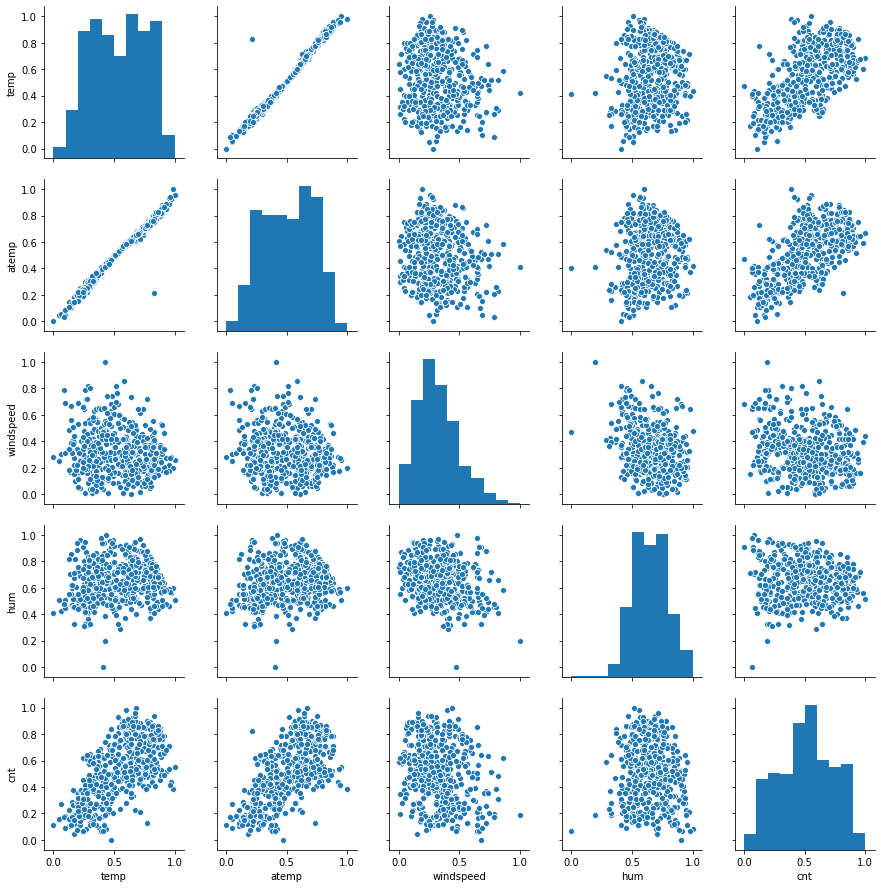

In [35]:
# numerical variables pair-plot
sns.pairplot(df_train[varils])

# Training the Model

###  Heat map to see corellation between cnt, temp, atemp, windspeed, hum

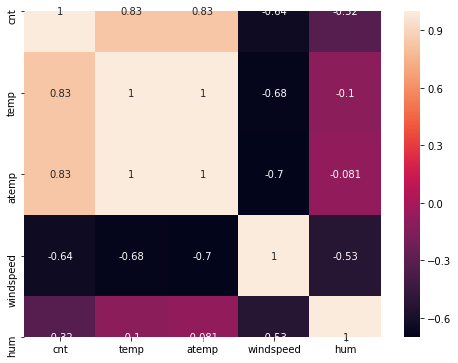

In [36]:
# creating a correlation matrix
corr_matrix=day_data[['cnt','temp','atemp','windspeed','hum',]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.corr(), annot=True)
plt.show()

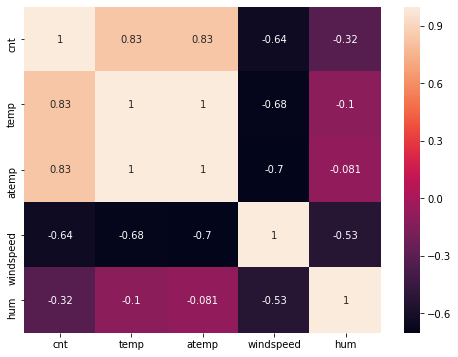

In [37]:
# adjusting the alignment of heatmap
plt.figure(figsize=(8, 6))
hm = sns.heatmap(corr_matrix.corr(), annot=True)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom+0.5, top-0.5)
plt.show()

# Building the model

In [38]:
# Create x and y or X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [39]:
# add a constant
X_train_sm = sm.add_constant(X_train['temp'])

# create first model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# parameters
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [40]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           2.46e-61
Time:                        16:44:09   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# since p-value is zero for oth const and temp hence the result is statistically significant
#  R-Squared is 0.416 it means about 42 percent of variance in cnt is explained by temp

In [42]:
# add another variable windspeed and update the model
X_train_sm = X_train[['temp', 'windspeed']]
X_train_sm = sm.add_constant(X_train_sm)

# create model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     194.5
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           1.99e-63
Time:                        16:44:10   Log-Likelihood:                 184.13
No. Observations:                 510   AIC:                            -362.3
Df Residuals:                     507   BIC:                            -349.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2409      0.026      9.156      0.000       0.189       0.293
temp           0.6154      0.034     18.213      0.000       0.549       0.682
windspeed     -0.1811      0.045     -4.030      0.000      -0.269      -0.093
==============================================================================
Omnibus:                       10.761   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                7.285
Skew:                           0.155   Prob(JB):                       0.0262
Kurtosis:                       2.504   Cond. No.                         8.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# add another variable hum and update the model
X_train_sm = X_train[['temp', 'windspeed', 'hum']]
X_train_sm = sm.add_constant(X_train_sm)

# create model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     152.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           2.87e-70
Time:                        16:44:10   Log-Likelihood:                 202.83
No. Observations:                 510   AIC:                            -397.7
Df Residuals:                     506   BIC:                            -380.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4596      0.043     10.580      0.000       0.374       0.545
temp           0.6381      0.033     19.447      0.000       0.574       0.703
windspeed     -0.2492      0.045     -5.571      0.000      -0.337      -0.161
hum           -0.3214      0.052     -6.205      0.000      -0.423      -0.220
==============================================================================
Omnibus:                        4.176   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                3.501
Skew:                           0.110   Prob(JB):                        0.174
Kurtosis:                       2.659   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# add another variable hum and update the model
X_train_sm = X_train[['temp', 'windspeed', 'hum', 'atemp']]
X_train_sm = sm.add_constant(X_train_sm)

# create model 
lr = sm.OLS(y_train, X_train_sm)

# fit
lr_model = lr.fit()

# parameters
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     115.1
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           1.06e-69
Time:                        16:44:11   Log-Likelihood:                 204.14
No. Observations:                 510   AIC:                            -398.3
Df Residuals:                     505   BIC:                            -377.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4521      0.044     10.364      0.000       0.366       0.538
temp           0.2779      0.226      1.232      0.219      -0.165       0.721
windspeed     -0.2353      0.045     -5.171      0.000      -0.325      -0.146
hum           -0.3266      0.052     -6.303      0.000      -0.428      -0.225
atemp          0.3897      0.242      1.613      0.107      -0.085       0.864
==============================================================================
Omnibus:                        2.796   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                2.462
Skew:                           0.081   Prob(JB):                        0.292
Kurtosis:                       2.701   Cond. No.                         66.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

since we can see that there is very less(0.003) increase in R-squared of last two previous models so we stop adding variables

# Residual analysis

In [46]:
# predicting Y_train
y_train_pred = lr_model.predict(X_train_sm)

In [47]:
# training R-squared
r2_score(y_true=y_train, y_pred=y_train_pred)

0.476913625953455

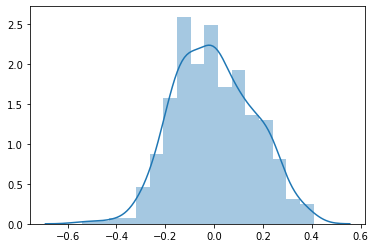

In [48]:
res = y_train - y_train_pred
sns.distplot(res)

In [49]:
# in above plot we can see that the distribution is centered around 0 and it is approximately normal

# Prediction and evaluation on test set

In [50]:

# Create a list of numeric variable
varils = ['temp','atemp','windspeed','hum','cnt']

#2. Fit on data
df_test[varils] = scale.transform(df_test[varils])
df_test.head()

,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_2019,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,yes_holiday,weekday_mon,weekday_tues,weekday_wed,weekday_thurs,weekday_fri,weekday_sat,workingday_yes,weathersit_2,weathersit_3
184,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
535,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
299,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
221,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
152,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [51]:
df_test.describe()

,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,season_winter,yr_2019,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,yes_holiday,weekday_mon,weekday_tues,weekday_wed,weekday_thurs,weekday_fri,weekday_sat,workingday_yes,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,0.236364,0.481818,0.100000,0.054545,0.090909,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364,0.036364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.700000,0.318182,0.027273
std,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,0.425817,0.500809,0.300684,0.227609,0.288135,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541,0.187620,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.459303,0.466833,0.163248
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Here we can see that max values of all have changed and many of them are not 1.
# This is because we have fit values of training set scaling on test set.

In [53]:
y_test = df_test.pop('cnt')
X_test = df_test

In [54]:
# adding a constant to X_test to make predictions
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,temp,atemp,hum,windspeed,season_summer,season_fall,season_winter,yr_2019,mnth_feb,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,yes_holiday,weekday_mon,weekday_tues,weekday_wed,weekday_thurs,weekday_fri,weekday_sat,workingday_yes,weathersit_2,weathersit_3
184,1.0,0.831783,0.769660,0.657364,0.084219,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
535,1.0,0.901354,0.842587,0.610133,0.153728,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
299,1.0,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
221,1.0,0.881625,0.795343,0.437098,0.339570,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
152,1.0,0.817246,0.741471,0.314298,0.537414,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [55]:
X_test_sm = X_test_sm.drop(['season_summer','season_fall','season_winter','yr_2019', 'mnth_feb','mnth_mar','mnth_apr','mnth_may',
                           'mnth_jun', 'mnth_jul', 'mnth_aug', 'mnth_sep', 'mnth_oct', 'mnth_nov', 'mnth_dec', 'yes_holiday',
                           'weekday_mon', 'weekday_tues', 'weekday_wed', 'weekday_thurs', 'weekday_fri', 'weekday_sat',
                            'workingday_yes', 'weathersit_2', 'weathersit_3'], axis=1)

In [56]:
X_test_sm.head()

,const,temp,atemp,hum,windspeed
184,1.0,0.831783,0.769660,0.657364,0.084219
535,1.0,0.901354,0.842587,0.610133,0.153728
299,1.0,0.511964,0.496145,0.837699,0.334206
221,1.0,0.881625,0.795343,0.437098,0.339570
152,1.0,0.817246,0.741471,0.314298,0.537414


In [57]:
# predict
y_test_pred = lr_model.predict(X_test_sm)

In [58]:
# evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

-0.44571945064888885

# Model evaluation

Text(0, 0.5, 'y_pred')

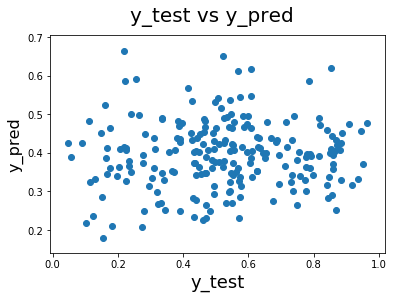

In [59]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)             
plt.ylabel('y_pred', fontsize = 16)      

As we can cleary see, the performance is dismal due to non-linearity of independent variables to dependent features and we could only predict around 40 percent of the outcomes.